In [1]:
#Code for the pipeline was significantly inspired on:
# /rayidghani/magicloops/blob/master/magicloops.py
# /hectorsalvador/ML_for_Public_Policy

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pylab as pl
pd.options.display.max_rows = 99
pd.options.display.max_columns = 99

# import pipline files:
import read
import explore
import clean
import features
import classify
import evaluate

#Global Variable:
DEP_VAR ='SeriousDlqin2yrs'
explore.DEP_VAR ='SeriousDlqin2yrs'
explore.LEAD_VAR = 2

/Users/ZHU/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ZHU/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df = read.read("credit-data.csv")
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
d = explore.explore(df)
summary = d["summary"]
fts = d["features"]

In [5]:
fts

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'zipcode',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [6]:
# Summary statistics for the whole dataset
summary

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
explore.plots(df)

Check the current folder for default histograms of these features.


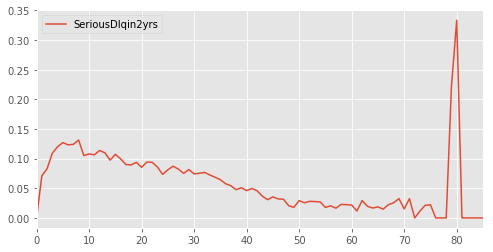

In [8]:
age_graph = explore.explore_var(df,'age','line')["graph"]

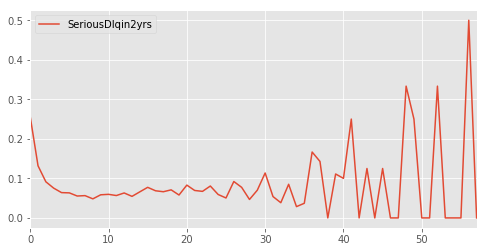

In [9]:
loan_graph = explore.explore_var(df,'NumberOfOpenCreditLinesAndLoans','line')["graph"]

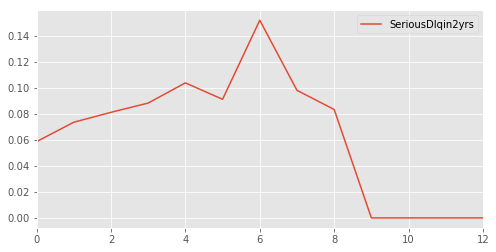

In [10]:
dependent_graph = explore.explore_var(df,'NumberOfDependents','line')["graph"]

In [11]:
#check the null value
clean.check_missing_data(df)

value,False,True
variable,,
DebtRatio,150000,0
MonthlyIncome,120269,29731
NumberOfDependents,146076,3924
NumberOfOpenCreditLinesAndLoans,150000,0
NumberOfTime30-59DaysPastDueNotWorse,150000,0
NumberOfTime60-89DaysPastDueNotWorse,150000,0
NumberOfTimes90DaysLate,150000,0
NumberRealEstateLoansOrLines,150000,0
PersonID,150000,0


In [12]:
#Check null values again after filling in missing values
df = clean.clean(df,'NumberOfDependents','zero')
df = clean.clean(df,'MonthlyIncome','mean')
clean.check_missing_data(df)

value,False
variable,
DebtRatio,150000
MonthlyIncome,150000
NumberOfDependents,150000
NumberOfOpenCreditLinesAndLoans,150000
NumberOfTime30-59DaysPastDueNotWorse,150000
NumberOfTime60-89DaysPastDueNotWorse,150000
NumberOfTimes90DaysLate,150000
NumberRealEstateLoansOrLines,150000
PersonID,150000


Generate categorical bin boundary for selected variables

In [13]:
features.binning(df, 'MonthlyIncome', 'quantiles', [0, 0.25, 0.5, 0.75, 1])
fts.append(df.keys()[-1])

In [14]:
df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bins_MonthlyIncome
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413,1.497340
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021,1.117032
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,3.000000


In [15]:
sel_fts = ['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [16]:
grid_size = 'small'
classifiers, grid = classify.define_clfs_params(grid_size)
models=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']
metrics = ['precision', 'recall', 'f1', 'auc']

In [ ]:
all_models = classify.classify(df[sel_fts], df[DEP_VAR], models, 3, 0.05, metrics,classifiers, grid)
#the number printing below is the time cost for each model

RF
0.77987408638
0.681610822678
0.636565923691
3.84939813614
3.82702112198
3.62642598152
0.670195102692
0.650848150253
0.697146177292
3.74888801575
3.52840399742
3.76528215408
0.737691879272
0.756421804428
0.764577150345
4.45533490181
4.43684697151
4.76539683342
0.7815721035
0.657479047775
0.760020017624
4.58343315125
4.67042303085
4.5877931118
1.16774201393
1.2339618206
1.15686583519
9.2142701149
9.21880722046
9.33572483063
1.1410779953
1.10914492607
1.13861918449
8.88863492012
8.98830986023
9.09971690178
1.48945498466
1.43107509613
1.48634696007
11.9586238861
11.7395951748
14.3756320477
1.44858407974
1.51810002327
1.47410917282
11.8968520164
11.5648560524
11.4720160961
Finished running RF
DT
0.0559160709381
0.0445959568024
0.0276739597321
0.029816865921
0.0526161193848
0.0298202037811
0.0434210300446
0.0583999156952
0.0441451072693
0.0294120311737
0.0608940124512
0.0358870029449
0.0477838516235
0.0309660434723
0.052925825119
0.0343980789185
0.0494899749756
0.0491631031036
0.115716934

In [ ]:
all_models

In [ ]:
table_auc, best_models_auc, winner_auc = classify.select_best_models(all_models, models, 'auc')
table_prec, best_models_prec, winner_prec = classify.select_best_models(all_models, models, 'precision')
table_rec, best_models_rec, winner_rec = classify.select_best_models(all_models, models, 'recall')
table_f1, best_models_f1, winner_f1 = classify.select_best_models(all_models, models, 'f1')

In [ ]:
table_auc

In [ ]:
table_prec

In [ ]:
table_rec

In [ ]:
table_f1

In [ ]:
best_models_auc

In [ ]:
best_models_prec

In [ ]:
best_models_rec

In [ ]:
best_models_f1

In [ ]:
winner_auc

In [ ]:
winner_prec

In [ ]:
winner_rec

In [ ]:
winner_f1

In [ ]:
classify.gen_precision_recall_plots(df[sel_fts], df[DEP_VAR], best_models_auc,classifiers)